
## Features of observations in Stock time-series

### Present information

### Lagged observations

### Technical indicators



TODO: finish all 22 indicators. First do individual notebook. Then compile here.

In [9]:
import talib
from talib.abstract import *
import numpy as np
import pandas as pd
import datetime as dt
import os, os.path

pd.options.mode.chained_assignment = None # Suppress warning

## Pilot Dataset

| Ticker | Industry/Sector                              | MktCap  | SET50 | Dataset Series-ID |
|--------|----------------------------------------------|---------|-------|-------------------|
| SCB    | Financials/Banking                           | 305000  | Y     | HS-1              |
| KBANK  | Financials/Banking                           | 276000  | Y     | HS-2              |
| AOT    | Services/Transportation & Logistics          | 946000  | Y     | HS-3              |
| BTS    | Services/Transportation & Logistics          | 134000  | Y     | HS-4              |
| AP     | Property & Construction/Property Development | 24000   | N     | HS-5              |
| LH     | Property & Construction/Property Development | 97000   | Y     | HS-6              |
| CPF    | Agro & Food Industry/Food & Beverage         | 243000  | Y     | HS-7              |
| KSL    | Agro & Food Industry/Food & Beverage         | 10000   | N     | HS-8              |
| PTT    | Resources/Energy & Utilities                 | 1228000 | Y     | HS-9              |
| RATCH  | Resources/Energy & Utilities                 | 83000   | Y     | HS-10             |

In [4]:
# Load set of stocks from dataset

DATA_HOME = os.path.join("..","dataset","historical")

symbols = ["SCB","KBANK","AOT","BTS","AP","LH","CPF","KSL","PTT","RATCH"]
data = {}
for s in symbols:
    data[s] = pd.read_csv(os.path.join(DATA_HOME,"%s.csv" % s), index_col=0)

# Select single stock series for analysis    
ticker = "SCB"
df = data[ticker]
df.index = pd.to_datetime(df.index)

period_start='2014-01-01'
period_end='2014-12-31'

daily = df[period_start:period_end]
daily

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,142.0,131.5,141.5,131.5,14726700.0,98.861626
2014-01-03,135.5,131.0,132.0,132.5,15410800.0,99.613434
2014-01-06,140.0,130.5,132.0,140.0,12798300.0,105.251930
2014-01-07,144.0,139.0,141.0,144.0,9352800.0,108.259125
2014-01-08,144.5,140.0,143.5,140.5,10750100.0,105.627823
...,...,...,...,...,...,...
2014-12-24,186.0,184.0,185.0,184.5,1868200.0,143.104462
2014-12-25,184.0,181.5,182.5,183.0,2521600.0,141.940994
2014-12-26,184.5,181.0,182.0,184.5,2458300.0,143.104462


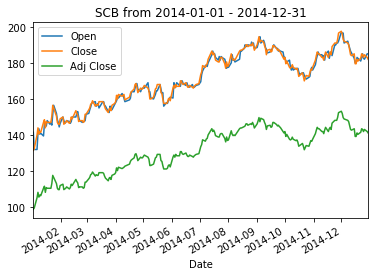

In [5]:
daily[['Open','Close','Adj Close']].plot(title="%s from %s - %s" % (ticker, period_start, period_end))

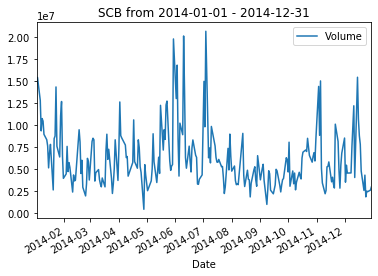

In [6]:
daily[['Volume']].plot(title="%s from %s - %s" % (ticker, period_start, period_end))

# Compute Technical Indicators

See TechnicalAnalysis/ folder for each indicator details.


## SMA

Simple n-day moving average. Average of the price over the calculation period.

## WMA

Weight average of last n-values. Use 14 days. So n=14 in [2]. n=10 in [9]

## EMA

Exponential Moving Average (EMA)
The weight of past prices decrease exponentially. [3] change value according to the input window being tested.

## RSI

Is an oscillator. Has value between 0-100. Evaluate magnitude of value change to assess overbought or oversold.
[2] calculate RSI using up/down and the end of period. Use n previouse day. [3] derive RSI from EMA and DM (direction movement indicator constructed from max function).
[9] use n=10,

## MOM

Momentum  
Indicate speed of the rise or fall in prices. [2] uses n+1; Security price rate of change. [11] sets to 10.


## Stochastic K%

the Stochastic Oscillator is used for three things; Identifying overbought and oversold levels, spotting divergences and also identifying bull and bear set ups or signals. https://www.tradingview.com/support/solutions/43000502332-stochastic-stoch/
See the calculation details.

## Stochastic D%

Momentum indicator over a particular period ... Indicate overbought or oversold.  
Is EMA(3) of Stochastic K%

In [13]:
# Note the use of Close instead of Adj Close for TI calculation.
inputs = {
    'open': daily["Open"],
    'high': daily["High"],
    'low': daily["Low"],
    'close': daily["Close"],
    'volume': daily["Volume"]
}

n = 5
daily_sma = SMA(inputs, timeperiod=n)
daily.loc[:,("SMA")] = daily_sma.tolist()    

n = 5
daily_wma = WMA(inputs, timeperiod=n)
daily.loc[:,("WMA")] = daily_wma.tolist()  

n = 5
daily_ema = EMA(inputs, timeperiod=n)
daily.loc[:,("EMA")] = daily_sma.tolist()

n = 5
rsi_5d = RSI(inputs, timeperiod=n)
n = 10
rsi_10d = RSI(inputs, timeperiod=n)
n = 15
rsi_15d = RSI(inputs, timeperiod=n)
daily.loc[:,("RSI-5")] = rsi_5d.tolist()
daily.loc[:,("RSI-10")] = rsi_10d.tolist()
daily.loc[:,("RSI-15")] = rsi_15d.tolist()

n = 10
mom_t10 = MOM(inputs, timeperiod=n)
daily.loc[:,("MOM-10")] = mom_t10.tolist()


# STOCH(high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
# See documentation in C code.
slowk, slowd = STOCH(inputs, prices=['high', 'low', 'close']) # No need for period.!! Check out the C documentation.
daily.loc[:,("Stoch-K")] = slowk.tolist()
daily.loc[:,("Stoch-D")] = slowd.tolist()

daily.head()

,High,Low,Open,Close,Volume,Adj Close,SMA,WMA,EMA,RSI-5,RSI-10,RSI-15,MOM-10,Stoch-K,Stoch-D
Date,,,,,,,,,,,,,,,
2014-01-02,142.0,131.5,141.5,131.5,14726700.0,98.861626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,135.5,131.0,132.0,132.5,15410800.0,99.613434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-06,140.0,130.5,132.0,140.0,12798300.0,105.251930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-07,144.0,139.0,141.0,144.0,9352800.0,108.259125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-08,144.5,140.0,143.5,140.5,10750100.0,105.627823,137.7,139.666667,137.7,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
daily.dropna(inplace=True)
daily.describe().T

,count,mean,std,min,25%,50%,75%,max
High,230.0,1.737413e+02,1.393973e+01,147.000000,1.625000e+02,1.755000e+02,1.860000e+02,1.990000e+02
Low,230.0,1.709478e+02,1.389910e+01,143.500000,1.591250e+02,1.725000e+02,1.828750e+02,1.960000e+02
Open,230.0,1.723239e+02,1.403600e+01,144.500000,1.605000e+02,1.747500e+02,1.845000e+02,1.970000e+02
Close,230.0,1.724652e+02,1.392819e+01,146.000000,1.601250e+02,1.747500e+02,1.845000e+02,1.975000e+02
Volume,230.0,6.039598e+06,3.325518e+06,460600.000000,3.781450e+06,5.278250e+06,7.410675e+06,2.064500e+07
Adj Close,230.0,1.324702e+02,1.193571e+01,109.762726,1.224560e+02,1.353481e+02,1.430166e+02,1.531877e+02
SMA,230.0,1.721652e+02,1.393672e+01,146.800000,1.610000e+02,1.740500e+02,1.839750e+02,1.952000e+02
WMA,230.0,1.722683e+02,1.390677e+01,146.966667,1.611167e+02,1.742000e+02,1.840167e+02,1.957667e+02
EMA,230.0,1.721652e+02,1.393672e+01,146.800000,1.610000e+02,1.740500e+02,1.839750e+02,1.952000e+02
RSI-5,230.0,5.474001e+01,1.960654e+01,14.860899,4.030661e+01,5.538662e+01,6.972630e+01,9.462335e+01


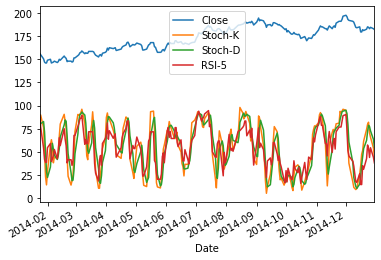

In [22]:
daily[['Close','Stoch-K','Stoch-D','RSI-5']].plot()